## Classification (c) - Update inside of batch

In [23]:
# from neuralnet_update_PC import *
# from neuralnet_works_FC import *
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_c = {}
config_c['layer_specs'] = [3072, 64, 64, 10]
config_c['activation'] = 'tanh'
config_c['learning_rate'] = 0.01
config_c['batch_size'] = 256
config_c['epochs'] = 200  
config_c['early_stop'] = True 
config_c['early_stop_epoch'] = 5
config_c['L2_penalty'] = 0  
config_c['momentum'] = True  
config_c['momentum_gamma'] = 0.9
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%

"""
Train your model here.
Implement batch SGD to train the model.
Implement Early Stopping.
Use config to set parameters for training like learning rate, momentum, etc.
"""
model_c  = Neuralnetwork(config_c)

# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)

epoch, train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train(model_c,x_train,y_train,x_valid,y_valid,config_c)

# Recall parameters with minimum validation loss
model_c.save_load_weight(save=False) # load data
test_accuracy = test(model_c, x_test, y_test) 


(50000, 32, 32, 3)
Epoch: 1, train accuracy: 0.2429, train_loss_norm:0.2908, valid_acc: 0.2608, valid_loss_norm: 0.2093
Valid loss going down!
Epoch: 2, train accuracy: 0.2857, train_loss_norm:0.2083, valid_acc: 0.2660, valid_loss_norm: 0.2094
Valid loss go up!
Current patience count: 1
Epoch: 3, train accuracy: 0.2955, train_loss_norm:0.2067, valid_acc: 0.2660, valid_loss_norm: 0.2071
Valid loss going down!
Epoch: 4, train accuracy: 0.3038, train_loss_norm:0.2046, valid_acc: 0.2630, valid_loss_norm: 0.2084
Valid loss go up!
Current patience count: 1
Epoch: 5, train accuracy: 0.3077, train_loss_norm:0.2030, valid_acc: 0.2892, valid_loss_norm: 0.2032
Valid loss going down!
Epoch: 6, train accuracy: 0.3143, train_loss_norm:0.2004, valid_acc: 0.2778, valid_loss_norm: 0.2043
Valid loss go up!
Current patience count: 1
Epoch: 7, train accuracy: 0.3193, train_loss_norm:0.1994, valid_acc: 0.2988, valid_loss_norm: 0.1993
Valid loss going down!
Epoch: 8, train accuracy: 0.3241, train_loss_norm:

Epoch: 62, train accuracy: 0.4076, train_loss_norm:0.1744, valid_acc: 0.3636, valid_loss_norm: 0.1815
Valid loss going down!
Epoch: 63, train accuracy: 0.4078, train_loss_norm:0.1745, valid_acc: 0.3614, valid_loss_norm: 0.1834
Valid loss go up!
Current patience count: 1
Epoch: 64, train accuracy: 0.4074, train_loss_norm:0.1746, valid_acc: 0.3692, valid_loss_norm: 0.1810
Valid loss going down!
Epoch: 65, train accuracy: 0.4114, train_loss_norm:0.1739, valid_acc: 0.3494, valid_loss_norm: 0.1846
Valid loss go up!
Current patience count: 1
Epoch: 66, train accuracy: 0.4101, train_loss_norm:0.1738, valid_acc: 0.3676, valid_loss_norm: 0.1793
Valid loss going down!
Epoch: 67, train accuracy: 0.4133, train_loss_norm:0.1732, valid_acc: 0.3654, valid_loss_norm: 0.1796
Valid loss go up!
Current patience count: 1
Epoch: 68, train accuracy: 0.4136, train_loss_norm:0.1728, valid_acc: 0.3534, valid_loss_norm: 0.1850
Valid loss go up!
Current patience count: 2
Epoch: 69, train accuracy: 0.4114, train_

Epoch: 122, train accuracy: 0.4456, train_loss_norm:0.1636, valid_acc: 0.3756, valid_loss_norm: 0.1851
Valid loss go up!
Current patience count: 2
Epoch: 123, train accuracy: 0.4475, train_loss_norm:0.1638, valid_acc: 0.3900, valid_loss_norm: 0.1766
Valid loss going down!
Epoch: 124, train accuracy: 0.4502, train_loss_norm:0.1627, valid_acc: 0.3832, valid_loss_norm: 0.1790
Valid loss go up!
Current patience count: 1
Epoch: 125, train accuracy: 0.4469, train_loss_norm:0.1633, valid_acc: 0.3874, valid_loss_norm: 0.1760
Valid loss going down!
Epoch: 126, train accuracy: 0.4460, train_loss_norm:0.1635, valid_acc: 0.3760, valid_loss_norm: 0.1776
Valid loss go up!
Current patience count: 1
Epoch: 127, train accuracy: 0.4507, train_loss_norm:0.1626, valid_acc: 0.3684, valid_loss_norm: 0.1826
Valid loss go up!
Current patience count: 2
Epoch: 128, train accuracy: 0.4481, train_loss_norm:0.1629, valid_acc: 0.3840, valid_loss_norm: 0.1816
Valid loss going down!
Epoch: 129, train accuracy: 0.4462

Epoch: 183, train accuracy: 0.4620, train_loss_norm:0.1582, valid_acc: 0.3840, valid_loss_norm: 0.1778
Valid loss go up!
Current patience count: 2
Epoch: 184, train accuracy: 0.4690, train_loss_norm:0.1566, valid_acc: 0.3916, valid_loss_norm: 0.1754
Valid loss going down!
Epoch: 185, train accuracy: 0.4679, train_loss_norm:0.1571, valid_acc: 0.3868, valid_loss_norm: 0.1815
Valid loss go up!
Current patience count: 1
Epoch: 186, train accuracy: 0.4665, train_loss_norm:0.1569, valid_acc: 0.3870, valid_loss_norm: 0.1771
Valid loss going down!
Epoch: 187, train accuracy: 0.4640, train_loss_norm:0.1576, valid_acc: 0.3926, valid_loss_norm: 0.1755
Valid loss going down!
Epoch: 188, train accuracy: 0.4686, train_loss_norm:0.1562, valid_acc: 0.4086, valid_loss_norm: 0.1724
Valid loss going down!
Epoch: 189, train accuracy: 0.4697, train_loss_norm:0.1566, valid_acc: 0.3956, valid_loss_norm: 0.1759
Valid loss go up!
Current patience count: 1
Epoch: 190, train accuracy: 0.4664, train_loss_norm:0.1

test set result :  0.3988


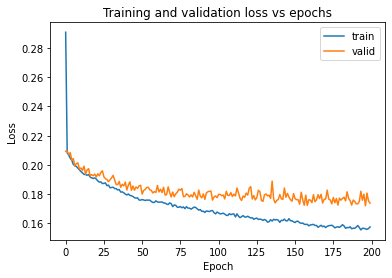

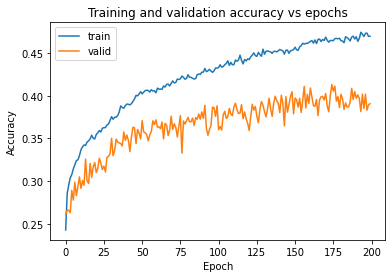

In [24]:
print('test set result : ' ,test_accuracy)

plt.figure(1)
plt.plot(np.arange(epoch+1), train_loss_record, label='train')
plt.plot(np.arange(epoch+1), holdout_loss_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(np.arange(epoch+1), train_accuracy_record, label='train')
plt.plot(np.arange(epoch+1), holdout_accuracy_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()